In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

# 1. Simple Perceptron learning 

In [3]:
#load data
text = np.loadtxt("data_perceptron.txt")

In [7]:
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0],1))

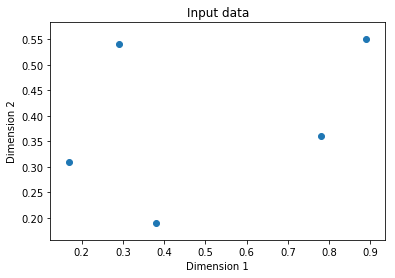

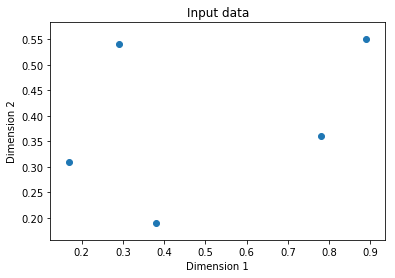

In [10]:
#input data visualization
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Input data")
plt.show()

In [12]:
#min & max value of each dimension
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

#number of neuron in output layer
num_output = labels.shape[1]

In [13]:
#perceptron definition
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output)

In [14]:
#learning
error_progress = perceptron.train(data, labels, epochs=100, show=20, lr=0.03)

The goal of learning is reached


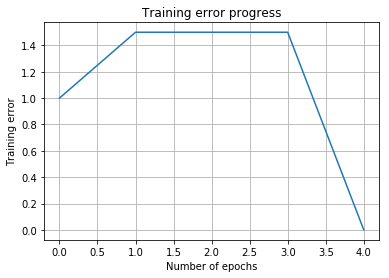

In [15]:
#visualize learning progress
plt.figure()
plt.plot(error_progress)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.title("Training error progress")
plt.grid()
plt.show()

<br><hr><br>

# 2. Single-layer Perceptron

In [2]:
#load data
text = np.loadtxt("data_simple_nn.txt")

In [4]:
data = text[:, 0:2]
labels = text[:, 2:]

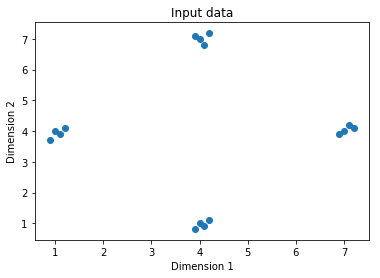

In [5]:
#data visualization
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Input data")
plt.show()

In [11]:
#min & max value of each dimension
dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()

In [14]:
#number of neuron in output layer
num_output = labels.shape[1]

In [15]:
#single layer perceptron defintion
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output)

In [16]:
#learning
error_progress = nn.train(data, labels, epochs=100, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


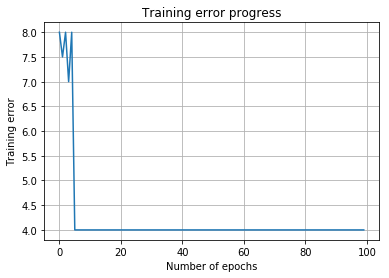

In [17]:
#visualize learning progress
plt.figure()
plt.plot(error_progress)
plt.xlabel("Number of epochs")
plt.ylabel("Training error")
plt.title("Training error progress")
plt.grid()
plt.show()

In [18]:
#classification performance check with test data
print("\nTest results:")
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(item, "-->", nn.sim([item])[0])


Test results:
[0.4, 4.3] --> [ 0.  0.]
[4.4, 0.6] --> [ 1.  0.]
[4.7, 8.1] --> [ 1.  1.]


In [22]:
nn.sim(data_test)

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 1.,  1.]])

<br><hr><br>

# 3. Multi-layer Perceptron

In [23]:
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

In [27]:
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

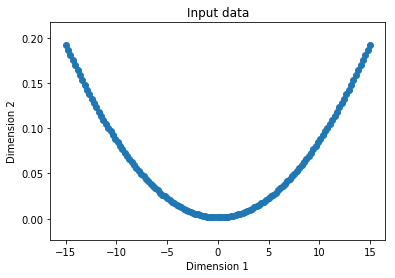

In [28]:
#data visualization
plt.figure()
plt.scatter(data, labels)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Input data")
plt.show()

In [30]:
#multi-layer perceptron definition (two-layer)
nn = nl.net.newff([[min_val, max_val]], [10,6,1])

In [31]:
#Gradient Descent
nn.trainf = nl.train.train_gd

In [32]:
#learning
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 0.021925036234267867;
Epoch: 200; Error: 0.01302039423580387;
The goal of learning is reached


In [34]:
output = nn.sim(data)
y_pred = output.reshape(num_points)

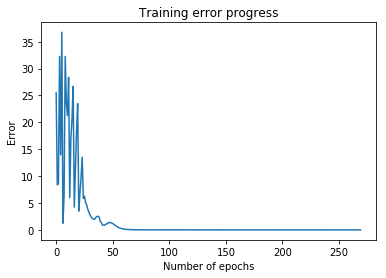

In [36]:
#visualize error progress
plt.figure()
plt.plot(error_progress)
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.title("Training error progress")
plt.show()

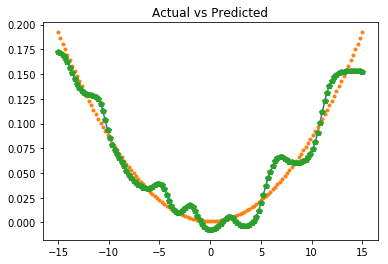

In [38]:
#visualize output
x_dense = np.linspace(min_val, max_val, num_points*2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)

plt.figure()
plt.plot(x_dense, y_dense_pred, "-", x, y, ".", x, y_pred, "p")
plt.title("Actual vs Predicted")
plt.show()